# 기본

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install chefboost

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from chefboost import Chefboost as chef
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [4]:
df = pd.read_csv('/content/drive/Shareddrives/데캡디/Result/Raw_data/x_plus_y_final.csv')

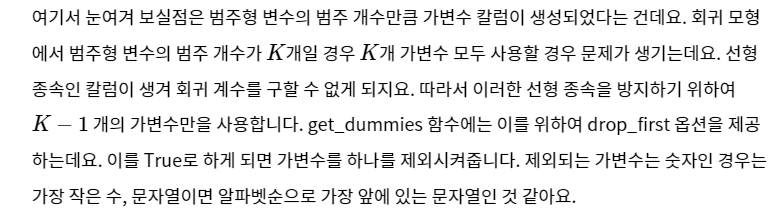

get_dummies 주의 사항

In [ ]:
config1 = {'algorithm' : 'ID3'}
config2 = {'algorithm' : 'CART'}
config3 = {'algorithm' : 'CHAID'}
config4 = {'algorithm' : 'C4.5'}

# 변수 추출

In [ ]:
df.corr(method = 'pearson')

,AGE,GENDER,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,...,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT,is_applied
AGE,1.000000,0.009507,-0.123509,0.034518,0.037432,0.022776,0.067052,0.040101,0.063310,0.023153,...,0.257579,-0.058152,0.244785,0.069847,0.216786,0.194178,0.112890,0.043722,0.018729,0.200485
GENDER,0.009507,1.000000,0.025616,-0.005092,-0.019527,-0.006440,-0.027633,-0.001848,-0.005357,-0.006812,...,-0.006293,-0.005923,-0.004498,-0.018514,-0.013629,-0.016453,-0.019238,0.009894,-0.013250,-0.052031
BIZ_TYP_CD_0000,-0.123509,0.025616,1.000000,-0.179852,-0.208172,-0.195719,-0.554255,-0.383513,-0.361058,-0.214967,...,-0.257514,0.003408,-0.194347,-0.465969,-0.191728,-0.177331,-0.230843,-0.035179,-0.056873,-0.257995
BIZ_TYP_CD_1000,0.034518,-0.005092,-0.179852,1.000000,0.004643,0.019978,0.009222,0.027860,0.007051,0.005340,...,0.034440,-0.001795,0.020335,0.100083,0.017197,0.013214,0.020633,0.006062,0.008069,0.041362
BIZ_TYP_CD_2000,0.037432,-0.019527,-0.208172,0.004643,1.000000,0.026443,0.000441,0.003022,0.015795,-0.003017,...,0.038731,-0.007920,0.022300,0.111163,0.029098,0.020738,0.023976,0.000069,0.049370,0.046789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD_CA_LMT,0.194178,-0.016453,-0.177331,0.013214,0.020738,0.035404,0.086013,0.069134,0.091733,0.053068,...,0.758888,0.019121,0.754519,0.147264,0.933459,1.000000,0.711846,0.168237,0.037794,0.392255
CD_USG_AMT,0.112890,-0.019238,-0.230843,0.020633,0.023976,0.040825,0.136282,0.095155,0.076205,0.081973,...,0.631597,0.039565,0.620050,0.198291,0.709622,0.711846,1.000000,0.116813,0.044888,0.366630
CD_CA_AMT,0.043722,0.009894,-0.035179,0.006062,0.000069,-0.002322,0.022910,0.010546,0.006883,0.021386,...,0.095074,0.011052,0.096453,0.012955,0.142704,0.168237,0.116813,1.000000,-0.000500,0.119594
GRNT_AMT,0.018729,-0.013250,-0.056873,0.008069,0.049370,0.015516,0.102947,0.005408,0.086323,0.006418,...,0.023316,0.008957,0.022277,0.018267,0.031598,0.037794,0.044888,-0.000500,1.000000,0.025102


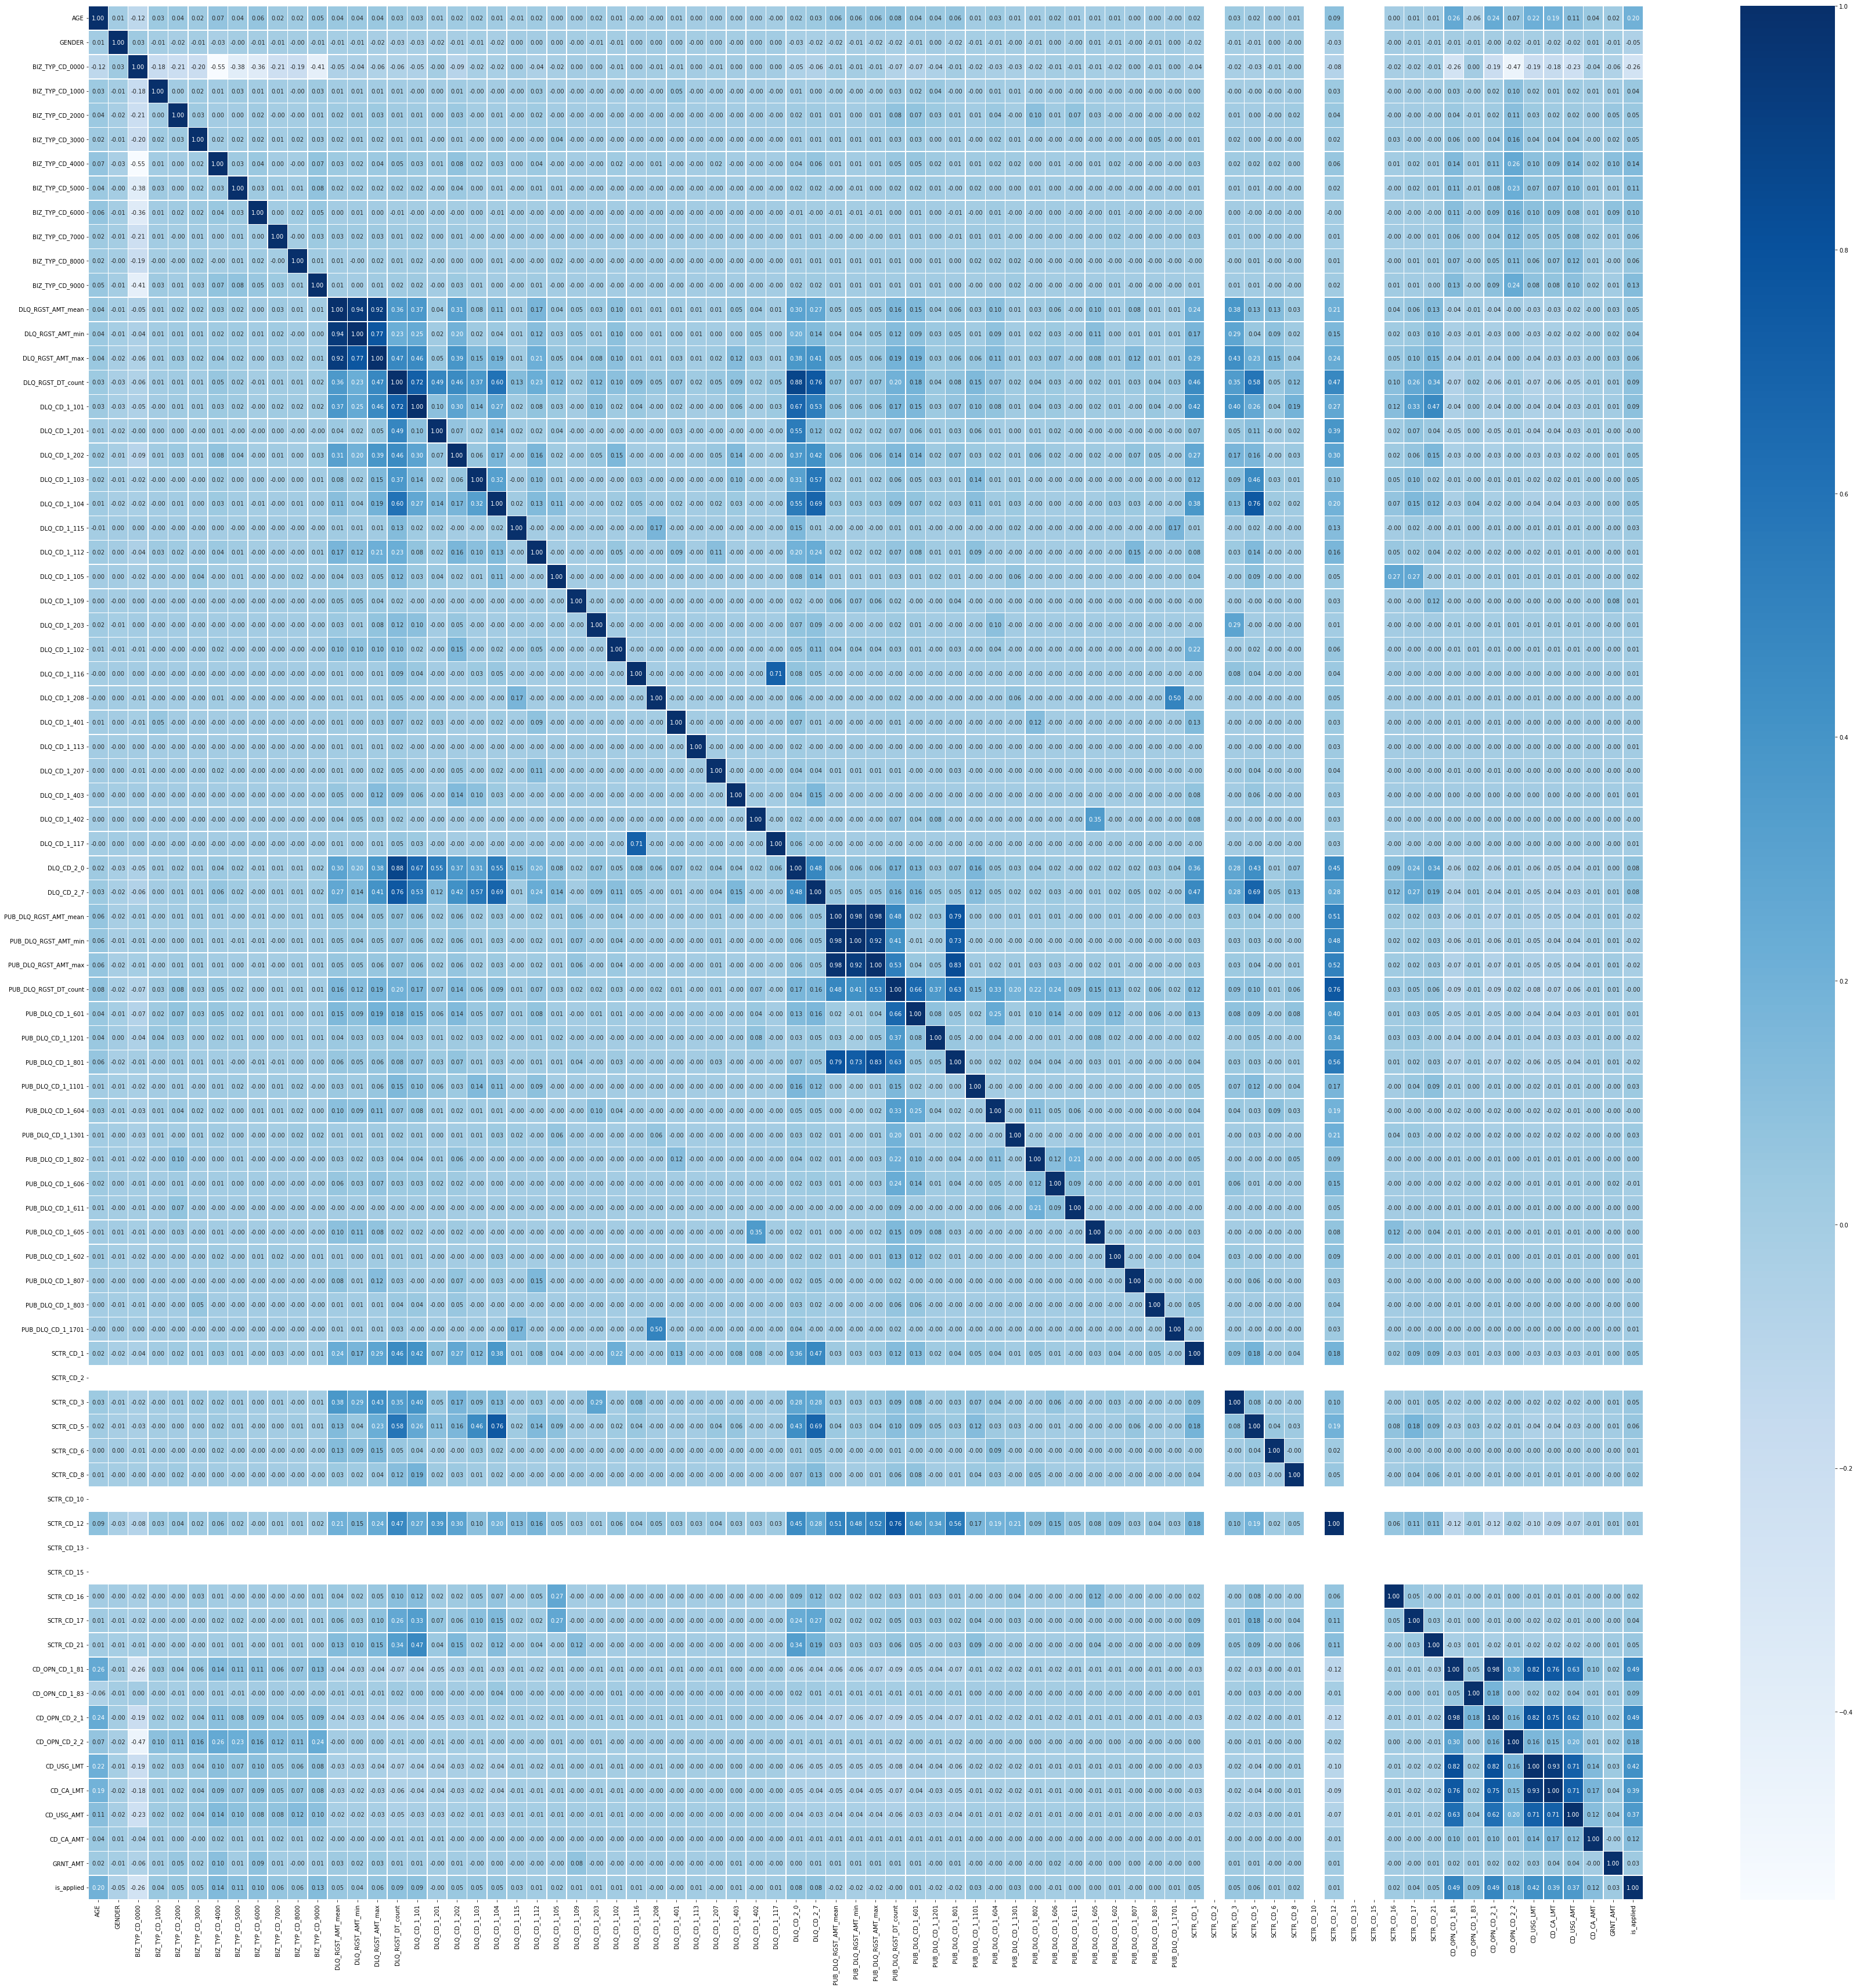

In [ ]:
fig, ax = plt.subplots(figsize=(60,60))
sns.heatmap(df.corr(method = 'pearson'),linewidth = 0.5, annot = True, fmt = '.2f', cmap = 'Blues', ax = ax)

 0.8≤r 일 때, 강한 상관이 있다. \\
 0.6≤r<0.8 일 때, 상관이 있다. \\
 0.4≤r<0.6 일 때, 약한 상관이 있다.

#Raw Data

In [ ]:
df

,AGE,GENDER,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,...,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT,is_applied
0,38,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.0,0.0,5.0,1.0,23966.666667,5895.555556,33040.0,0.0,0.0,1.0
1,12,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,37,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,18750.000000,4400.000000,21280.0,0.0,0.0,0.0
3,12,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,63,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3.0,0.0,3.0,0.0,30000.000000,4377.777778,96010.0,0.0,2130000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48280,58,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
48281,46,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,13640.000000,4540.000000,70780.0,0.0,0.0,1.0
48282,49,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,30000.000000,15769.230769,16360.0,1100.0,0.0,1.0
48283,60,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,12666.666667,4000.000000,25370.0,0.0,0.0,0.0


In [5]:
# feature, label 분리
X = df.drop('is_applied', axis = 1)
Y = df['is_applied']

In [6]:
# 그냥 원본 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
y_train.value_counts()

0.0    24916
1.0    13712
Name: is_applied, dtype: int64

In [ ]:
x_train

,AGE,GENDER,BIZ_TYP_CD_0000,BIZ_TYP_CD_1000,BIZ_TYP_CD_2000,BIZ_TYP_CD_3000,BIZ_TYP_CD_4000,BIZ_TYP_CD_5000,BIZ_TYP_CD_6000,BIZ_TYP_CD_7000,...,SCTR_CD_21,CD_OPN_CD_1_81,CD_OPN_CD_1_83,CD_OPN_CD_2_1,CD_OPN_CD_2_2,CD_USG_LMT,CD_CA_LMT,CD_USG_AMT,CD_CA_AMT,GRNT_AMT
31375,79,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
47440,18,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
33890,21,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
35657,42,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,4566.666667,1633.333333,2920.0,0.0,0.0
45262,37,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,45,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,6724.000000,2532.000000,12860.0,46340.0,0.0
44732,84,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
38158,37,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0
860,78,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
x_train.to_csv('')

In [ ]:
# feature 추출
selector = SelectKBest(score_func = f_regression, k=30)
x_train_s = selector.fit_transform(x_train, y_train)
x_test_s = selector.transform(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


#### XGboost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.8)


xgb.fit(x_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=2, n_estimators=500, nthread=-1,
              seed=2019, silent=True, subsample=0.8)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 24.4 MB/s 
     |████████████████████████████████| 133 kB 49.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a1ed085be8a22705c0dc098fc85ad8775e77a3e4725b4e20b2a2c33e09bb44c3
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(xgb, random_state = 42).fit(x_test, y_test)

In [ ]:
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0314 ± 0.0045,CD_USG_AMT
0.0212 ± 0.0034,CD_CA_AMT
0.0177 ± 0.0021,AGE
0.0161 ± 0.0038,CD_OPN_CD_2_1
0.0150 ± 0.0031,CD_OPN_CD_1_81
0.0099 ± 0.0031,CD_USG_LMT
0.0076 ± 0.0028,BIZ_TYP_CD_0000
0.0062 ± 0.0038,CD_CA_LMT
0.0025 ± 0.0010,DLQ_CD_1_101
0.0017 ± 0.0021,GENDER


In [ ]:
temp = eli5.explain_weights_df(perm)
temp.head()

,feature,weight,std
0,x74,0.031438,0.002225
1,x75,0.021187,0.001686
2,x0,0.017666,0.001051
3,x70,0.016133,0.001923
4,x68,0.015015,0.001548


In [ ]:
importance_cols_p = temp[temp['weight']>0]['feature'].map(lambda x:int(x.replace('x', ''))).values
importance_cols_p = x_train.columns[importance_cols_p].values
importance_cols_p
#importance_cols_p = importance_cols_p[:20]
#importance_cols_p = importance_cols_p[:25]
#importance_cols_p = importance_cols_p[:30]


In [ ]:
x_train_selected = x_train[importance_cols_p]
x_test_selected = x_test[importance_cols_p]

x_train_selected.shape, x_test_selected.shape

((38628, 35), (9657, 35))

In [ ]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2019,
       silent=True, subsample=0.9)

xgb.fit(x_train_selected, y_train)

XGBClassifier(colsample_bytree=0.9, gamma=2, n_estimators=800, nthread=-1,
              seed=2019, silent=True, subsample=0.9)

In [ ]:
y_pred_xgb = xgb.predict(x_test_selected)
# y_pred_xgb = xgb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      6349
         1.0       0.74      0.59      0.66      3308

    accuracy                           0.79      9657
   macro avg       0.78      0.74      0.75      9657
weighted avg       0.79      0.79      0.78      9657



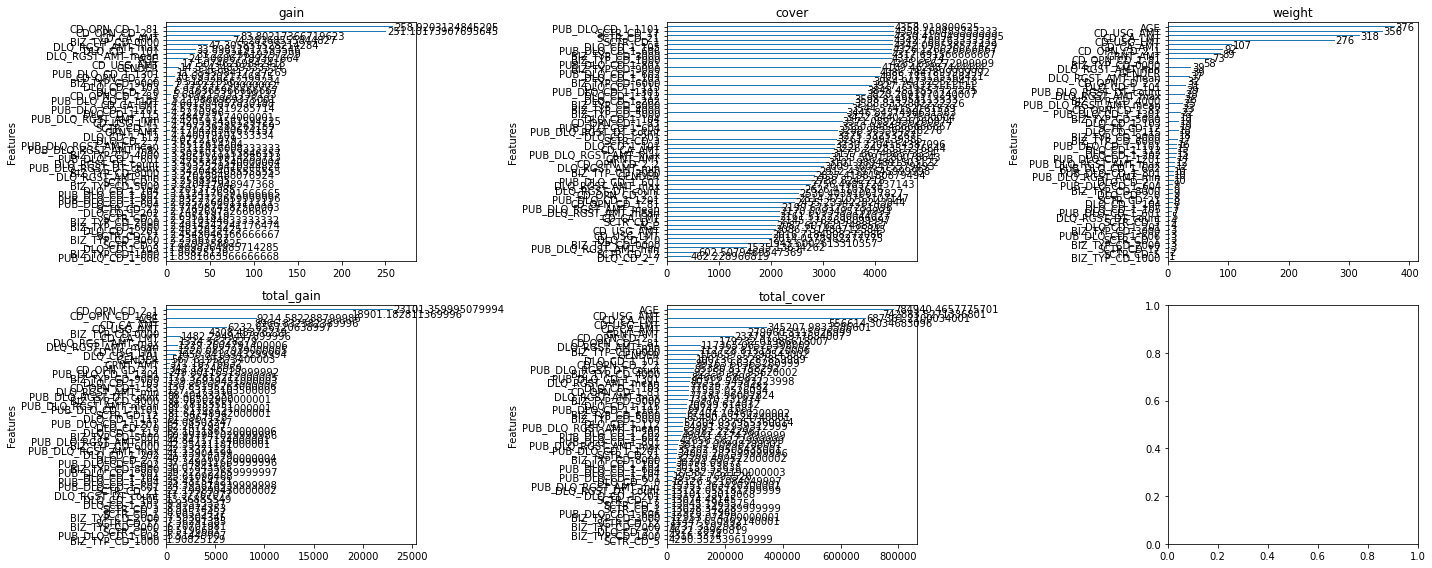

In [ ]:
import xgboost
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

axes = [ax for row_axes in axes for ax in row_axes]

xgboost.plot_importance(xgb, importance_type='gain', title='gain', xlabel='', grid=False, ax=axes[0])
xgboost.plot_importance(xgb, importance_type='cover', title='cover', xlabel='', grid=False, ax=axes[1])
xgboost.plot_importance(xgb, importance_type='weight', title='weight', xlabel='', grid=False, ax=axes[2])
xgboost.plot_importance(xgb, importance_type='total_gain', title='total_gain', xlabel='', grid=False, ax=axes[3])
xgboost.plot_importance(xgb, importance_type='total_cover', title='total_cover', xlabel='', grid=False, ax=axes[4])
plt.tight_layout()
plt.show()

In [ ]:
y_pred_xgb = xgb.predict(x_test_s)

In [ ]:
print(classification_report(y_test, y_pred_xgb)) 

NameError: ignored

In [ ]:
confusion_matrix(y_test, y_pred_xgb)

array([[7025,  859],
       [1719, 2469]])

In [ ]:
print(roc_auc_score(y_test, y_pred_xgb))

0.7402933510108608


#####Grid

In [ ]:
xgb_param_grid={
    'n_estimators' : [100, 800], 
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,7,10],
    'gamma' : [0,1,2],
    'colsample_bytree' : [0.8,0.9],
} # 개수 적당히

In [ ]:
grid = XGBClassifier()

In [ ]:
xgb_grid=GridSearchCV(grid, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
xgb_grid.fit(x_train_selected, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0, 1, 2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 800]},
             scoring='f1_macro', verbose=2)

In [ ]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.9, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 800}


In [ ]:
print(xgb_grid.best_score_)

0.755785818263749


#### LGBM


In [ ]:
import lightgbm as lgb

In [ ]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.where(y_hat < 0.5, 0, 1)   # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [ ]:
train_ds = lgb.Dataset(x_train, label = y_train)
test_ds = lgb.Dataset(x_test, label = y_test)
params = {'learning_rate': 0.01,
          'max_depth': 16,
          'boosting': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'is_training_metric': True,
          'num_leaves': 144,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'seed':2020}

model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100, 
                  feval = lgb_f1_score)

pred_lgb=model.predict(x_test)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.476221	valid_0's f1: 0.624035
[200]	valid_0's binary_logloss: 0.439181	valid_0's f1: 0.653344
[300]	valid_0's binary_logloss: 0.429959	valid_0's f1: 0.660269
[400]	valid_0's binary_logloss: 0.427482	valid_0's f1: 0.66463
[500]	valid_0's binary_logloss: 0.427031	valid_0's f1: 0.664457
Early stopping, best iteration is:
[445]	valid_0's binary_logloss: 0.426981	valid_0's f1: 0.665871


#### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=42)
clf.fit(x_train_s, y_train)

RandomForestClassifier(max_depth=100, n_estimators=200, random_state=42)

In [ ]:
pred_clf = clf.predict(x_test_s)

In [ ]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      7884
         1.0       0.72      0.60      0.65      4188

    accuracy                           0.78     12072
   macro avg       0.76      0.74      0.74     12072
weighted avg       0.77      0.78      0.77     12072



In [ ]:
print(confusion_matrix(y_test, pred_clf))

[[6383 1501]
 [1255 2933]]


####CART, CHAID, C4.5

In [ ]:
k = 5
selector = SelectKBest(score_func = f_regression, k= k)
x_train_s = selector.fit_transform(x_train, y_train)
x_test_s = selector.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [ ]:
# 변수 개수 추출해서 진행
y_list = y_train.to_list()
x_train_sd = pd.DataFrame(x_train_s)
x_train_sd['is_applied'] = y_list

y_test_list = y_test.to_list()
x_test_sd = pd.DataFrame(x_test_s)
x_test_sd['is_applied'] = y_test_list


In [ ]:
i = 0
list1 = []
while i != k + 1:
    list1.append(str(i))
    i += 1
x_train_sd.columns = list1
x_test_sd.columns = list1

In [ ]:
x_train_sd.loc[x_train_sd['{0}'.format(k)] == 0.0, '{0}'.format(k)] = "No"
x_train_sd.loc[x_train_sd['{0}'.format(k)] == 1.0, '{0}'.format(k)] = "YES"
x_test_sd.loc[x_test_sd['{0}'.format(k)] == 0.0, '{0}'.format(k)] = "No"
x_test_sd.loc[x_test_sd['{0}'.format(k)] == 1.0, '{0}'.format(k)] = "YES"

In [ ]:
x_test_sd

,0,1,2,3,4,5
0,2.0,2.0,5066.666667,1311.111111,64920.0,YES
1,4.0,4.0,11907.446809,2900.000000,85980.0,No
2,0.0,0.0,0.000000,0.000000,0.0,No
3,0.0,0.0,0.000000,0.000000,0.0,No
4,6.0,6.0,29489.795918,12663.265306,79590.0,YES
...,...,...,...,...,...,...
12067,4.0,4.0,14662.337662,4890.909091,35820.0,YES
12068,0.0,0.0,0.000000,0.000000,0.0,YES
12069,1.0,1.0,0.000000,0.000000,0.0,No
12070,0.0,0.0,0.000000,0.000000,0.0,No


In [ ]:
x_test_sd.rename(columns = {'{0}'.format(k) : 'Decision'}, inplace = True)

In [ ]:
x_test_sd

,0,1,2,3,4,Decision
0,2.0,2.0,5066.666667,1311.111111,64920.0,YES
1,4.0,4.0,11907.446809,2900.000000,85980.0,No
2,0.0,0.0,0.000000,0.000000,0.0,No
3,0.0,0.0,0.000000,0.000000,0.0,No
4,6.0,6.0,29489.795918,12663.265306,79590.0,YES
...,...,...,...,...,...,...
12067,4.0,4.0,14662.337662,4890.909091,35820.0,YES
12068,0.0,0.0,0.000000,0.000000,0.0,YES
12069,1.0,1.0,0.000000,0.000000,0.0,No
12070,0.0,0.0,0.000000,0.000000,0.0,No


In [ ]:
model1 = chef.fit(x_train_sd, config = config2, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  6.968079328536987  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  75.75180183911854 % on  36213  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[18789, 4189], [4592, 8643]]
Precision:  81.7695 %, Recall:  80.3601 %, F1:  81.0587 %


In [ ]:
chef.evaluate(model1, x_test_sd)

-------------------------
Evaluate  test set
-------------------------
Accuracy:  76.05202120609675 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[2848, 1551], [1340, 6333]]
Precision:  64.742 %, Recall:  68.0038 %, F1:  66.3328 %


In [ ]:
model2 = chef.fit(x_train_sd, config = config3, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  52.42393136024475  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  76.60508657112086 % on  36213  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[19292, 4383], [4089, 8449]]
Precision:  81.4868 %, Recall:  82.5114 %, F1:  81.9959 %


In [ ]:
chef.evaluate(model2, x_test_sd)

['0', '1', '2', '3', '4', '5', '6', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  76.70642809807819 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[2773, 1397], [1415, 6487]]
Precision:  66.4988 %, Recall:  66.213 %, F1:  66.3556 %


In [ ]:
model3 = chef.fit(x_train_sd, config = config4, target_label = '{0}'.format(k))

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  24.365274667739868  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  76.26542954187723 % on  36213  instances
Labels:  ['No' 'YES']
Confusion matrix:  [[18698, 3912], [4683, 8920]]
Precision:  82.6979 %, Recall:  79.9709 %, F1:  81.3115 %


In [ ]:
chef.evaluate(model3, x_test_sd)

['0', '1', '2', '3', '4', '5', '6', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  76.45791915175613 % on  12072  instances
Labels:  ['YES' 'No']
Confusion matrix:  [[2930, 1584], [1258, 6300]]
Precision:  64.9092 %, Recall:  69.9618 %, F1:  67.3409 %


Raw Data CART, CHAID. C4.5 모델은 \\
Accuracy: 76 \\
Precision: 65-70 \\
Recall:65-70 \\
F1: 65-70